In [22]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt

dataset = fetch_california_housing(data_home=None, download_if_missing=True, return_X_y=False, as_frame=False)

In [23]:
X = pd.DataFrame(dataset.data, columns=dataset['feature_names']) #split data into X, target value
y = pd.DataFrame(dataset.target, columns=dataset['target_names'])

data = pd.concat([X, y])

data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [24]:
X.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

In [25]:
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X) #data normalization


In [26]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2) #find pca with 2 features
principal_components = pca.fit_transform(X)

principal_df = pd.DataFrame(data= principal_components, columns=['principal 1', 'principal 2'])

In [27]:
final_df = pd.concat([principal_df, y], axis=1)

In [28]:
final_df

,principal 1,principal 2,MedHouseVal
0,1.882704,-0.503362,4.526
1,1.371120,-0.121406,3.585
2,2.086868,-0.501136,3.521
3,1.575801,-1.239495,3.413
4,1.591206,-1.345264,3.422
...,...,...,...
20635,1.386779,-1.296137,0.781
20636,1.875219,-0.671533,0.771
20637,1.402357,-1.096426,0.923
20638,1.542943,-1.059408,0.847


In [29]:
principal_df.values
y.values.flatten()

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

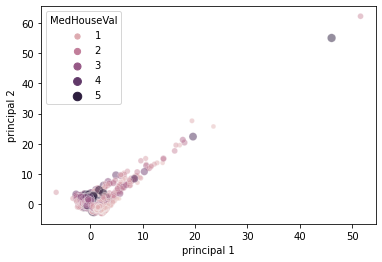

In [30]:
import seaborn as sns

graph = sns.scatterplot(data=final_df,
                x='principal 1',
                y='principal 2',
                hue='MedHouseVal',
                size='MedHouseVal',
                alpha=.5
                )

plt.savefig('afa.png', dpi=600)